In [57]:
import numpy as np
import pandas as pd
import scipy.stats
import skimage
import skimage.io
import matplotlib.pyplot as plt
from course_functions import random_cmap
cmap = random_cmap()
import mxnet
from cellpose import models

## Image loading

Specify the location of your files:

In [4]:
images = skimage.io.ImageCollection('../Data/BBBC007_v1_images/A9/*d.tif')

## Segment the images

In [93]:
masks = [skimage.morphology.label(im > skimage.filters.threshold_otsu(
    im)) for im in images]

## Display the segmentation

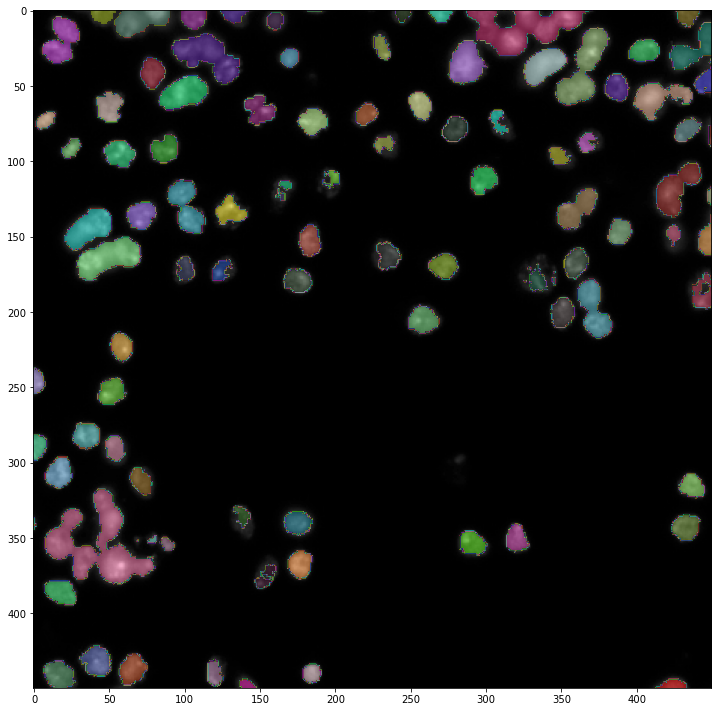

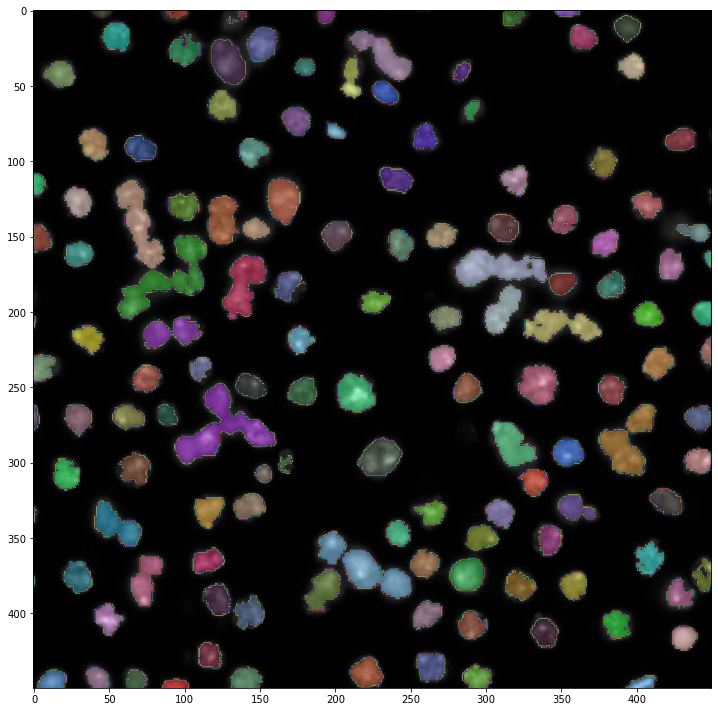

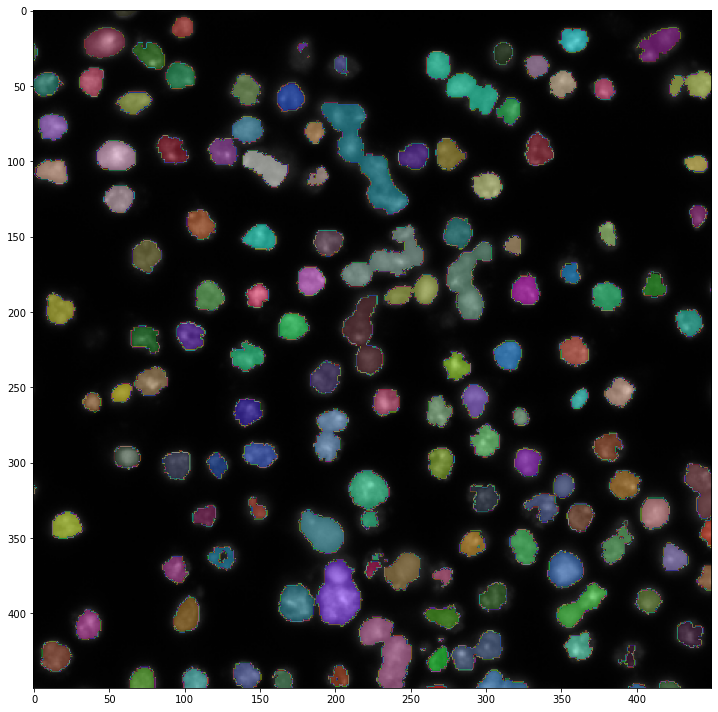

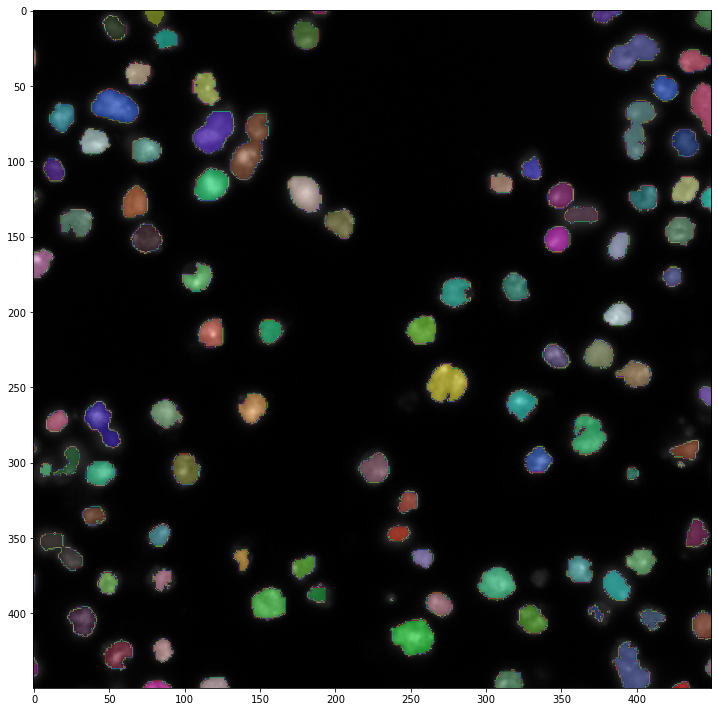

In [101]:
#fig = plt.figure(figsize=(10,10))
for x in range(4):
    fig = plt.figure(figsize=(10,10))
    #fig.add_subplot(2,2,x+1)
    plt.imshow(images[x],cmap = 'gray')
    plt.imshow(masks[x], cmap = cmap)
    fig.tight_layout()
    fig.savefig('Results/segmentation'+str(x)+'.png')

## Data analysis

Analyse segmented regions:

In [95]:
regions = pd.concat([pd.DataFrame(skimage.measure.regionprops_table(
    m, images[ind], properties=('label','area','mean_intensity'))) for ind, m in enumerate(masks)])

In [96]:
lr = scipy.stats.linregress(regions.area, regions.mean_intensity)

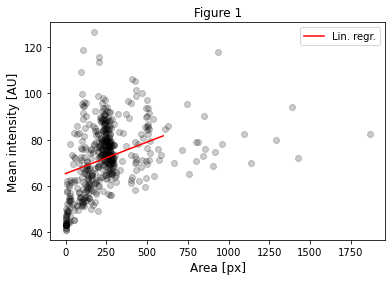

In [103]:
fig, ax = plt.subplots()
plt.plot(regions.area, regions.mean_intensity, 'ok', alpha = 0.2)
plt.plot(np.arange(0,600), np.arange(0,600)*lr.slope + lr.intercept,'r',label = 'Lin. regr.')
ax.set_xlabel('Area [px]', fontdict={'size':12})
ax.set_ylabel('Mean intensity [AU]', fontdict={'size':12})
ax.set_title('Figure 1');
ax.legend();
fig.savefig('Results/plot.png')